In [2]:
import os
import numpy as np
import deepdish as dd
import pandas as pd
import nibabel as nb
import Functional_Fusion.dataset as fdata # from functional fusion module
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import cortico_cereb_connectivity.data as cdata
import cortico_cereb_connectivity.cio as cio
import cortico_cereb_connectivity.summarize as cs

import Functional_Fusion.atlas_map as am
import nitools as nt
from pathlib import Path
import warnings
fig_dir =  '/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/Talks/2023/08_Gordon'

/Users/jdiedrichsen/miniconda3/lib/python3.11/site-packages/torch/__init__.py:748: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/tensor/python_tensor.cpp:448.)
  _C._set_default_tensor_type(t)


In [3]:
# Compute the average connecivity for the model for each cortical parcel
traindata = 'MdWfIbDeHtNiSoScLa'
cortex_roi = "Icosahedron1002"
method = 'NNLS'
stats = 'prob'
cifti_img = cs.stats_weight_map_cortex(traindata = traindata,
                            cortex_roi = cortex_roi,
                            method = method,
                            extension='A2_group',
                            stats = stats)
fname = gl.conn_dir + f'/maps/{traindata}_{cortex_roi}_{method}_{stats}.pscalar.nii'
nb.save(cifti_img,fname)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


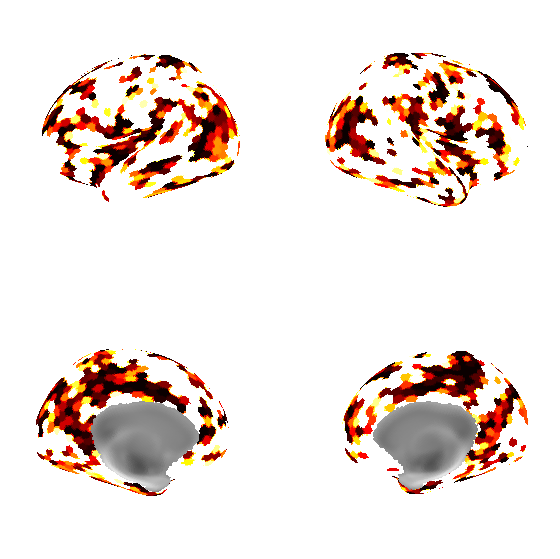

In [ ]:
nb.load(gl.conn_dir + f'/maps/{traindata}_{cortex_roi}_{method}_{stats}.pscalar.nii')
data = nt.surf_from_cifti(cifti_img) 
cs.plot_cortical_inflated(axes=None,data=data,scale=[0,1])


0.0

##  Buckner vs. Yeo 7/17 region sizes (winner take all)

In [7]:
cortical_roi = "yeo17"
cereb_roi = "Buckner17"
# Get the cortical labels from the gifti file 
cort_label = []
for i,h in enumerate(["L","R"]):
    lname = gl.atlas_dir + f"/tpl-fs32k/{cortical_roi}.{h}.label.gii"
    gii = nb.load(lname)
    cort_label.append(gii.agg_data())
label_names = nt.get_gifti_labels(gii)
label_colors,cmap = nt.get_gifti_colortable(gii)
cort_label = np.concatenate(cort_label,axis=0)

# Get the cerebellar labels from the nifti file
lname = gl.atlas_dir + f"/tpl-SUIT/atl-{cereb_roi}_space-SUIT_dseg.nii"
nii = nb.load(lname)
cereb_label = nii.get_fdata()

# Get the masking image
mname = gl.atlas_dir + f"/tpl-SUIT/tpl-SUIT_res-1_gmcmask.nii"
nii_m = nb.load(mname)
cereb_mask = nii_m.get_fdata()
cereb_label = cereb_label*cereb_mask

# Build the table
K =cereb_label.max().astype(int)
cereb_size= np.zeros((K,))
cort_size= np.zeros((K,))
for k in range(K):
    cereb_size[k] = np.sum(cereb_label==k+1)
    cort_size[k]  = np.sum(cort_label==k+1)
cereb_size = cereb_size/np.sum(cereb_size)*100
cort_size = cort_size/np.sum(cort_size)*100

T={'name':label_names[1:],
    'cort_size':cort_size,
    'cereb_size':cereb_size}
T=pd.DataFrame(T)
label_colors = label_colors[1:,:]

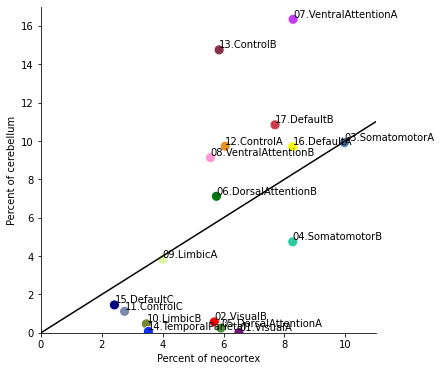

In [16]:
plot_figure(T,label_colors)
plt.savefig(fig_dir + '/Yeo17_networksize.pdf', bbox_inches='tight')

## Yeo 17 based on connectivty weights

In [18]:
T1,colors1 = csw.get_weight_by_cortex(dataset_name='Fusion',extension='06')

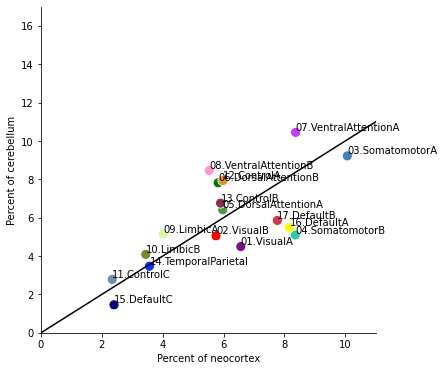

In [19]:
plot_figure(T1,colors1)
plt.savefig(fig_dir + '/Yeo17_inputsize.pdf', bbox_inches='tight')

In [7]:
T2,colors = csw.get_weight_by_cortex(dataset_name='HCP',extension='A-2')

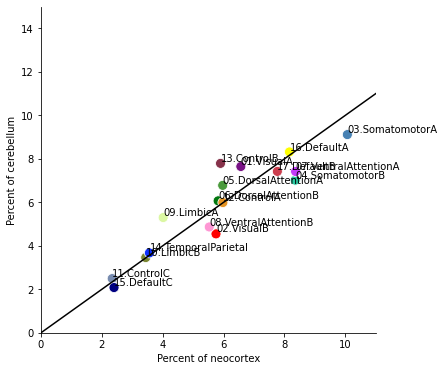

In [8]:
plot_figure(T2,colors)

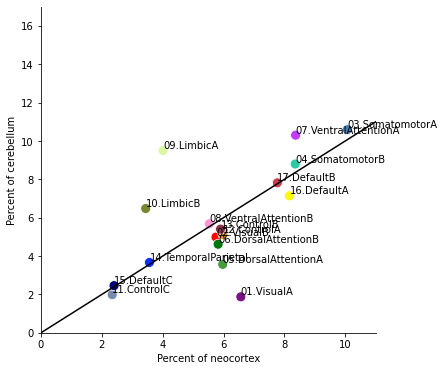

In [20]:
T3,colors = csw.get_weight_by_cortex(dataset_name='MDTB',extension='A6')
plot_figure(T3,colors)